
**Objective**: Predict the next day’s maximum temperature using the last 30 days' data.

**Column to Predict**: `MaxTemp` (also called `meantemp` in the dataset)


## Step 1: Load and Inspect the Data (1 Mark)

🔍 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

🧾 First few rows:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


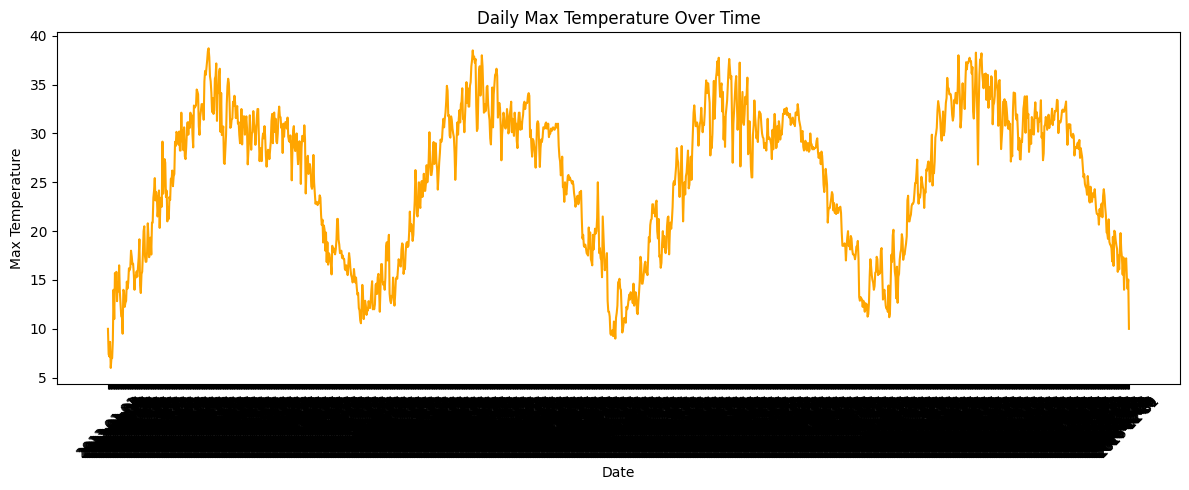

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

print("🔍 Data Information:")
print(df.info())
print("\n🧾 First few rows:")
print(df.head())

# Plot MaxTemp over time
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['meantemp'], color='orange')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Daily Max Temperature Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Step 2: Preprocess the Data (2 Marks)

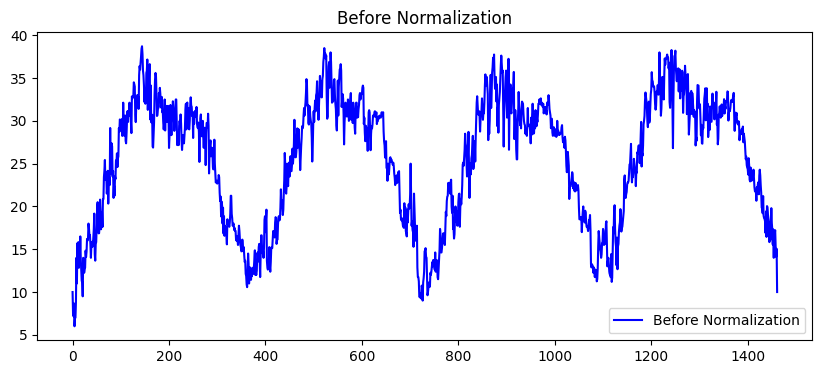

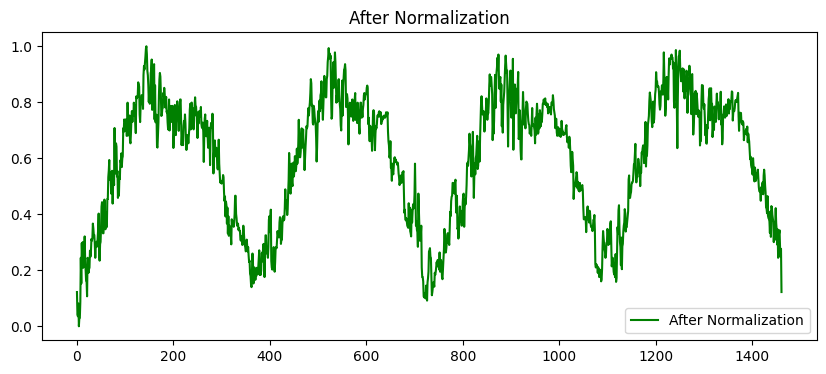

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract only MaxTemp column
data = df['meantemp'].values.reshape(-1, 1)

# Plot before normalization
plt.figure(figsize=(10, 4))
plt.plot(data, label="Before Normalization", color='blue')
plt.title("Before Normalization")
plt.legend()
plt.show()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

plt.figure(figsize=(10, 4))
plt.plot(data_scaled, label="After Normalization", color='green')
plt.title("After Normalization")
plt.legend()
plt.show()

## Step 3: Create Sequences for Prediction (2 Marks)

In [4]:
def create_sequences(data, seq_length=30):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 30
x, y = create_sequences(data_scaled, seq_length)
x = x.reshape((x.shape[0], x.shape[1], 1))

print("✅ Shape of input x:", x.shape)
print("✅ Shape of output y:", y.shape)

✅ Shape of input x: (1432, 30, 1)
✅ Shape of output y: (1432, 1)


##  Step 4: Build & Compile an RNN Model (2 Marks)

In [6]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(units=50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model & Visualize Loss (1.5 Marks)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1347 - val_loss: 0.0105
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0088
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - val_loss: 0.0054
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - val_loss: 0.0048


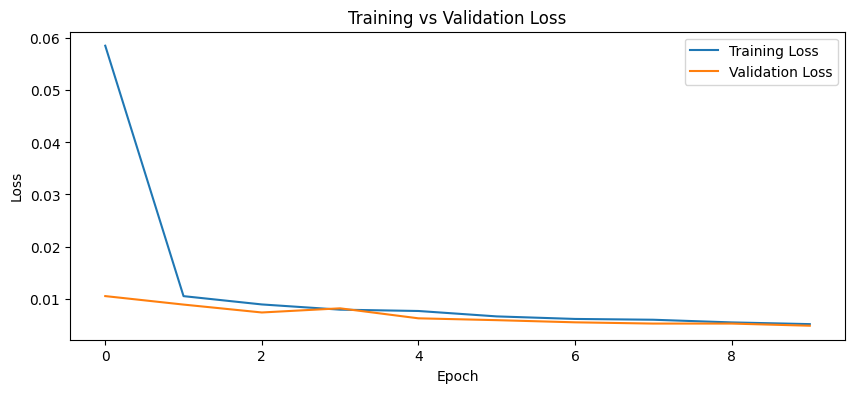

In [8]:
history = model.fit(x, y, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

## Step 6: Evaluate the Model & Plot Predictions (1.5 Marks)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


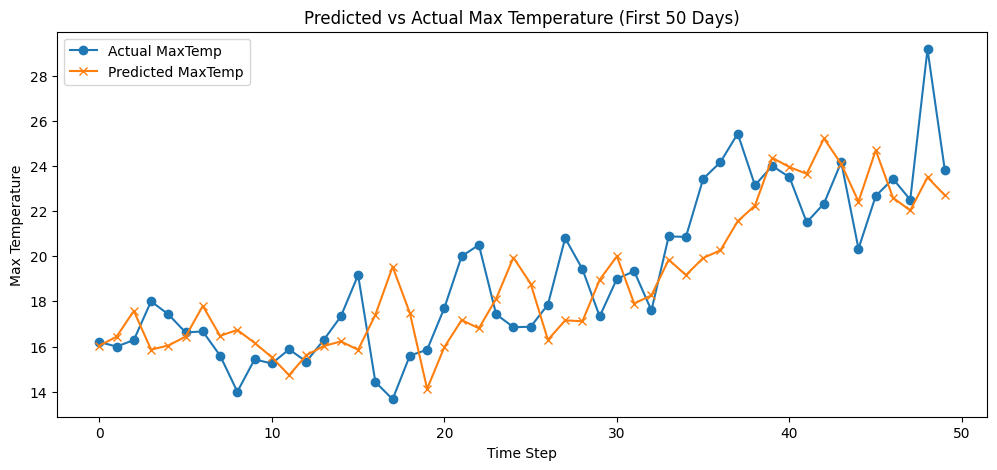

In [9]:
predictions = model.predict(x)

predicted_temp = scaler.inverse_transform(predictions)
true_temp = scaler.inverse_transform(y.reshape(-1, 1))

# Plot predicted vs actual temperatures (first 50 points)
plt.figure(figsize=(12, 5))
plt.plot(true_temp[:50], label="Actual MaxTemp", marker='o')
plt.plot(predicted_temp[:50], label="Predicted MaxTemp", marker='x')
plt.xlabel("Time Step")
plt.ylabel("Max Temperature")
plt.title("Predicted vs Actual Max Temperature (First 50 Days)")
plt.legend()
plt.show()